# ***Feature frame dataset***

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc

In [150]:
feature_frame_path = '/Users/alex/zriveAM/zrive-ds/aws/data/feature_frame.csv'
feature_frame_df = pd.read_csv(feature_frame_path)

In [151]:
feature_frame_df.head(10)

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
5,33826472919172,ricepastapulses,2808434524292,3479090790532,2020-10-06 10:50:23,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
6,33826472919172,ricepastapulses,2808548917380,3476645445764,2020-10-06 14:23:08,2020-10-06 00:00:00,5,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
7,33826472919172,ricepastapulses,2808549900420,3437017956484,2020-10-06 14:24:26,2020-10-06 00:00:00,13,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
8,33826472919172,ricepastapulses,2808673927300,3539005440132,2020-10-06 17:57:23,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
9,33826472919172,ricepastapulses,2808728715396,3421126885508,2020-10-06 19:36:06,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [152]:
feature_frame_df['normalised_price'].head()

0    0.081052
1    0.081052
2    0.081052
3    0.081052
4    0.081052
Name: normalised_price, dtype: float64

Cada fila de este dataset es una combinación usuario-producto y outcome determina si ese usuario ha comprado ese producto, junto con otras columnas que nos dan información adiccional.

Primero de todo, quiero comprobar si realmente existen todas las combinaciones.

In [153]:
unique_products= feature_frame_df['variant_id'].nunique()
unique_users= feature_frame_df['user_id'].nunique()
unique_combinations = unique_products * unique_users

print(f"There are {unique_products} unique products")
print(f"There are {unique_users} unique users")
print(f"There should be {unique_combinations} unique combinations")


There are 976 unique products
There are 1937 unique users
There should be 1890512 unique combinations


In [154]:
real_unique_combinations= feature_frame_df[['variant_id', 'user_id']].drop_duplicates().shape[0]
print(f"There are {real_unique_combinations} unique combinations")

There are 1682424 unique combinations


Lo que hago a continuación es ver la distribución de productos por usuario, lo cual nos ayuda a identificar algun patron en usuarios que no estan asociados a todos los productos

In [155]:
user_product_counts = feature_frame_df.groupby('user_id')['variant_id'].nunique()
print(user_product_counts.describe())

print('--------------------------------------')
print(user_product_counts.sort_values().head(3))
print('--------------------------------------')
print(user_product_counts.sort_values().tail(3))


count    1937.000000
mean      868.572019
std        73.710590
min       614.000000
25%       834.000000
50%       877.000000
75%       915.000000
max       976.000000
Name: variant_id, dtype: float64
--------------------------------------
user_id
3537167515780    614
3421126885508    624
3539005440132    624
Name: variant_id, dtype: int64
--------------------------------------
user_id
3874925314180    976
3875142467716    976
5029635227780    976
Name: variant_id, dtype: int64


In [156]:
user_1 = feature_frame_df[feature_frame_df['user_id'] == 3537167515780]
print("User 1 date:", user_1['created_at'].value_counts())

user_2 = feature_frame_df[feature_frame_df['user_id'] == 3539005440132]
print("User 2 date:", user_1['created_at'].value_counts())


User 1 date: created_at
2020-10-06 10:37:05    614
Name: count, dtype: int64
User 2 date: created_at
2020-10-06 10:37:05    614
Name: count, dtype: int64


In [157]:
user_3 = feature_frame_df[feature_frame_df['user_id'] == 5029635227780]
print("User 3 date:", user_3['created_at'].value_counts())
user_4 = feature_frame_df[feature_frame_df['user_id'] == 3875142467716]
print("User 4 date:", user_4['created_at'].value_counts())

User 3 date: created_at
2021-03-03 13:15:57    976
Name: count, dtype: int64
User 4 date: created_at
2021-03-03 08:03:33    976
2021-02-05 09:36:41    877
Name: count, dtype: int64


In [158]:
print(feature_frame_df['created_at'].min())
print(feature_frame_df['created_at'].max())

2020-10-05 16:46:19
2021-03-03 14:42:05


Vemos como tiene sentido que, los primeros usuarios no tienen combinacion con todos los productos (ya que no estaban disponibles), mientras que los ultimos usuarios si que tienen todas las combinaciones.

Hay que tener en cuenta también, que cada combinacion aparecera tantas veces como pedidos haya hecho ese usuario, por eso el dataset tiene mas filas que las combinaciones posibles.

Vamos a entender las columnas del dataset:

In [159]:
print('Dataframe info:')
print(feature_frame_df.info())

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults        

In [160]:
print("Null values:")
print(feature_frame_df.isnull().sum())

Null values:
variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0

outcome
0.0    0.988463
1.0    0.011537
Name: proportion, dtype: float64


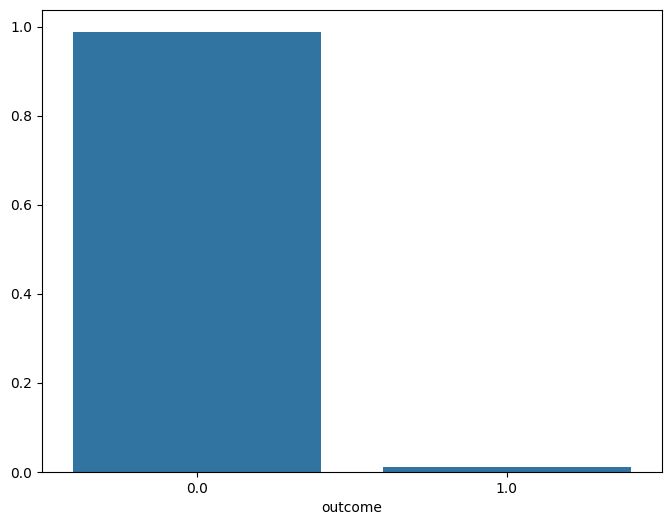

In [161]:
#Distribution of outcome
outcome_dist=feature_frame_df['outcome'].value_counts(normalize=True)
print(outcome_dist)

plt.figure(figsize=(8,6))
sns.barplot(x=outcome_dist.index, y= outcome_dist.values)
plt.show()

In [162]:
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(feature_frame_df.sample(10))

             variant_id              product_type       order_id        user_id           created_at           order_date  user_order_seq  outcome  ordered_before  abandoned_before  active_snoozed  set_as_regular  normalised_price  discount_pct        vendor  global_popularity  count_adults  count_children  count_babies  count_pets  people_ex_baby  days_since_purchase_variant_id  avg_days_to_buy_variant_id  std_days_to_buy_variant_id  days_since_purchase_product_type  avg_days_to_buy_product_type  std_days_to_buy_product_type
2581239  34284952748164                homebaking  2825780396164  3489972617348  2020-10-27 10:19:48  2020-10-27 00:00:00               3      0.0             0.0               0.0             0.0             0.0          0.021415      0.253165   silverspoon           0.023762           2.0             0.0           0.0         0.0             2.0                            33.0                        63.5                   33.827532                              3

* variant_id: Id del producto

* product type: Tipo de producto  

* order_id: Id de la orden (misma combinación usuario-producto puede existir más de una vez). Outcome será 1 en los productos que ha pedido para esa orden y 0 para los productos que no ha pedido.

* user_id: Id del usuario

* created_at: Fecha creación pedido

* order_date: Fecha pedido realizado

* user_order_seq: Numero de pedido de un determinado usuario (4 --> es su cuarto pedido)

* outcome: Determina si usuario compra un producto dado un order_id (etiqueta de nuestro problema)

* ordered_before: 1 si producto se ha pedido anteriormente por un determinado usuario , 0 si no se ha pedido antes

* abandoned_before: 1 si producto se ha abandonado anteriormente por un determinado usuario , 0 si no se ha abandonado antes

* active_snoozed: 1 si producto esta en estado "snoozed" (guardado para más tarde ?)

* set_as_regular: Producto marcado como favorito por un determinado usuario

* normalised_price: Precio normalizado del producto

* discount_pct: Porcentaje de descuento del prodcuto

* vendor: Provedor/marca del producto

* global_popularity: Popularidad calculada de cada producto

* count_adults: Número de adultos asociados al user_id

* count_children: Número de niños asociados al user_id

* count_babies: Número de bebés asociados al user_id

* count_pets: Número de mascotas asociados al user_id

* people_ex_baby: Número de personas asociadas al user_id excluyendo bebés

* days_since_purchase_variant_id: Número de días desde la última vez que el usuario compro un determinado variant_id

* avg_days_to_buy_variant_id: Promedio de días que tarda el usuario en comprar un determinado variant_id

* std_days_to_buy_varinat_id: desviación estándar de los días que tarda el usuario en comprar un determinado variant_id

* days_since_purchase_product_type: Número de días desde la última vez que el usuario compro un determinado product_type

* avg_days_to_buy_product_type: Promedio de días que tarda el usuario en comprar un determinado product_type

* std_days_to_buy_product_type: desviación estándar de los días que tarda el usuario en comprar un determinado product_type



In [163]:
info_cols = ['variant_id', 'order_id', 'user_id','created_at', 'order_date']
label_col = 'outcome'
features_cols = [col for col in feature_frame_df.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

In [164]:
for col in binary_cols:
    print(f"Value counts {col}: {feature_frame_df[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value: {feature_frame_df.groupby(col)[label_col].mean().to_dict()}")

Value counts ordered_before: {0.0: 2819658, 1.0: 60891}
Mean outcome by ordered_before value: {0.0: 0.008223337723936732, 1.0: 0.1649669080816541}
Value counts abandoned_before: {0.0: 2878794, 1.0: 1755}
Mean outcome by abandoned_before value: {0.0: 0.011106039542947498, 1.0: 0.717948717948718}
Value counts active_snoozed: {0.0: 2873952, 1.0: 6597}
Mean outcome by active_snoozed value: {0.0: 0.011302554809544488, 1.0: 0.1135364559648325}
Value counts set_as_regular: {0.0: 2870093, 1.0: 10456}
Mean outcome by set_as_regular value: {0.0: 0.010668992259135854, 1.0: 0.24971308339709258}


Estas variables binarias están estrechamente relacionadas con el resultado.

En concreto, abandoned_before. Si un artículo no se ha abandonado antes, sólo se comprará el 1,11% de las veces.

Sin embargo, si un artículo ha sido abandonado anteriormente, se comprará el 71,8% de las veces en un pedido futuro.

Algunas como snooze o abandoned son muy extremas, quizas prodrían eliminarse o crear una meta feaure que represente si el usuario ha interactuado con el producto antes ( si cualquiera de las features anteriores es 1, meta feature es 1, si todas son 0, meta feature es 0)

<Axes: >

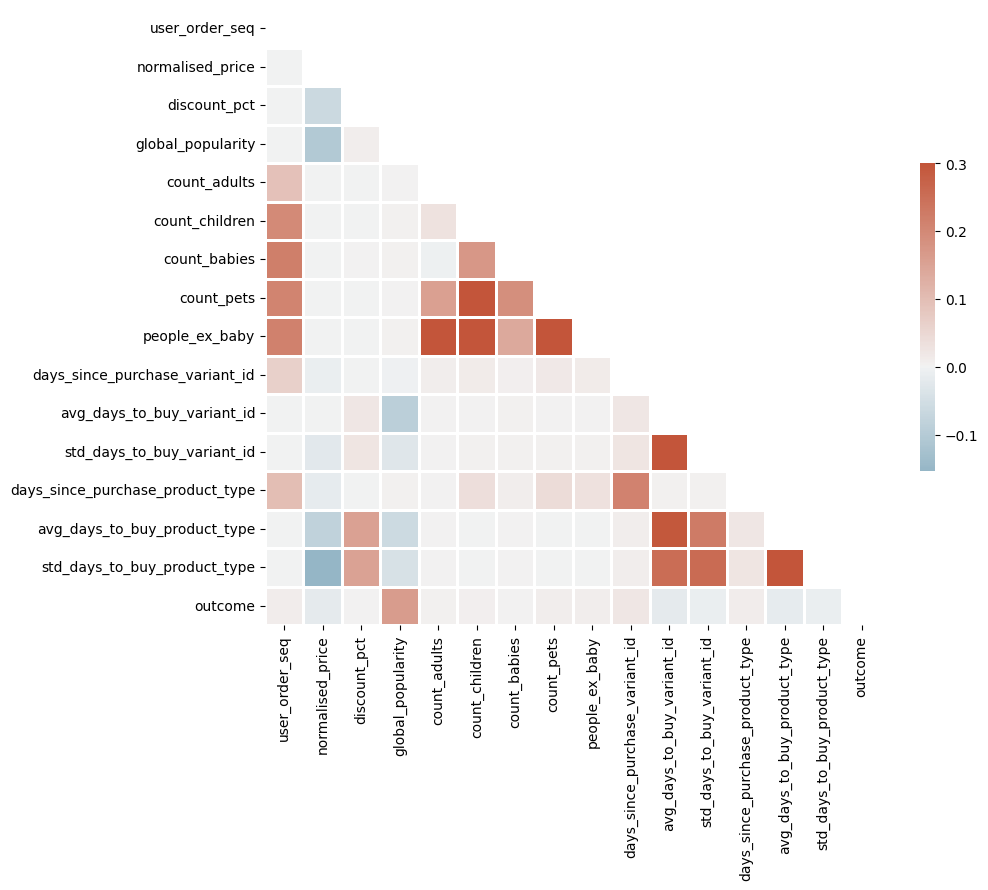

In [165]:
#Correlation matrix

corr = feature_frame_df[numerical_cols + [label_col]].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink":0.5}
)

* Check correlations between variables

* Check correlations with outcome

Algunas variables númericas están moderadamente correladas. Algo a tener en cuenta si utilizamos modelos donde la colinearidad pueda ser importante.

people_ex_baby esta correlada con count_adults ya que el nº de adultos esta muy relacionado al numero de personas excluyendo bebes.

people_ex_baby correlada con count_pets sugiere que las familias con mas personas (excluyedno bebés) tienden a tener más mascotas.

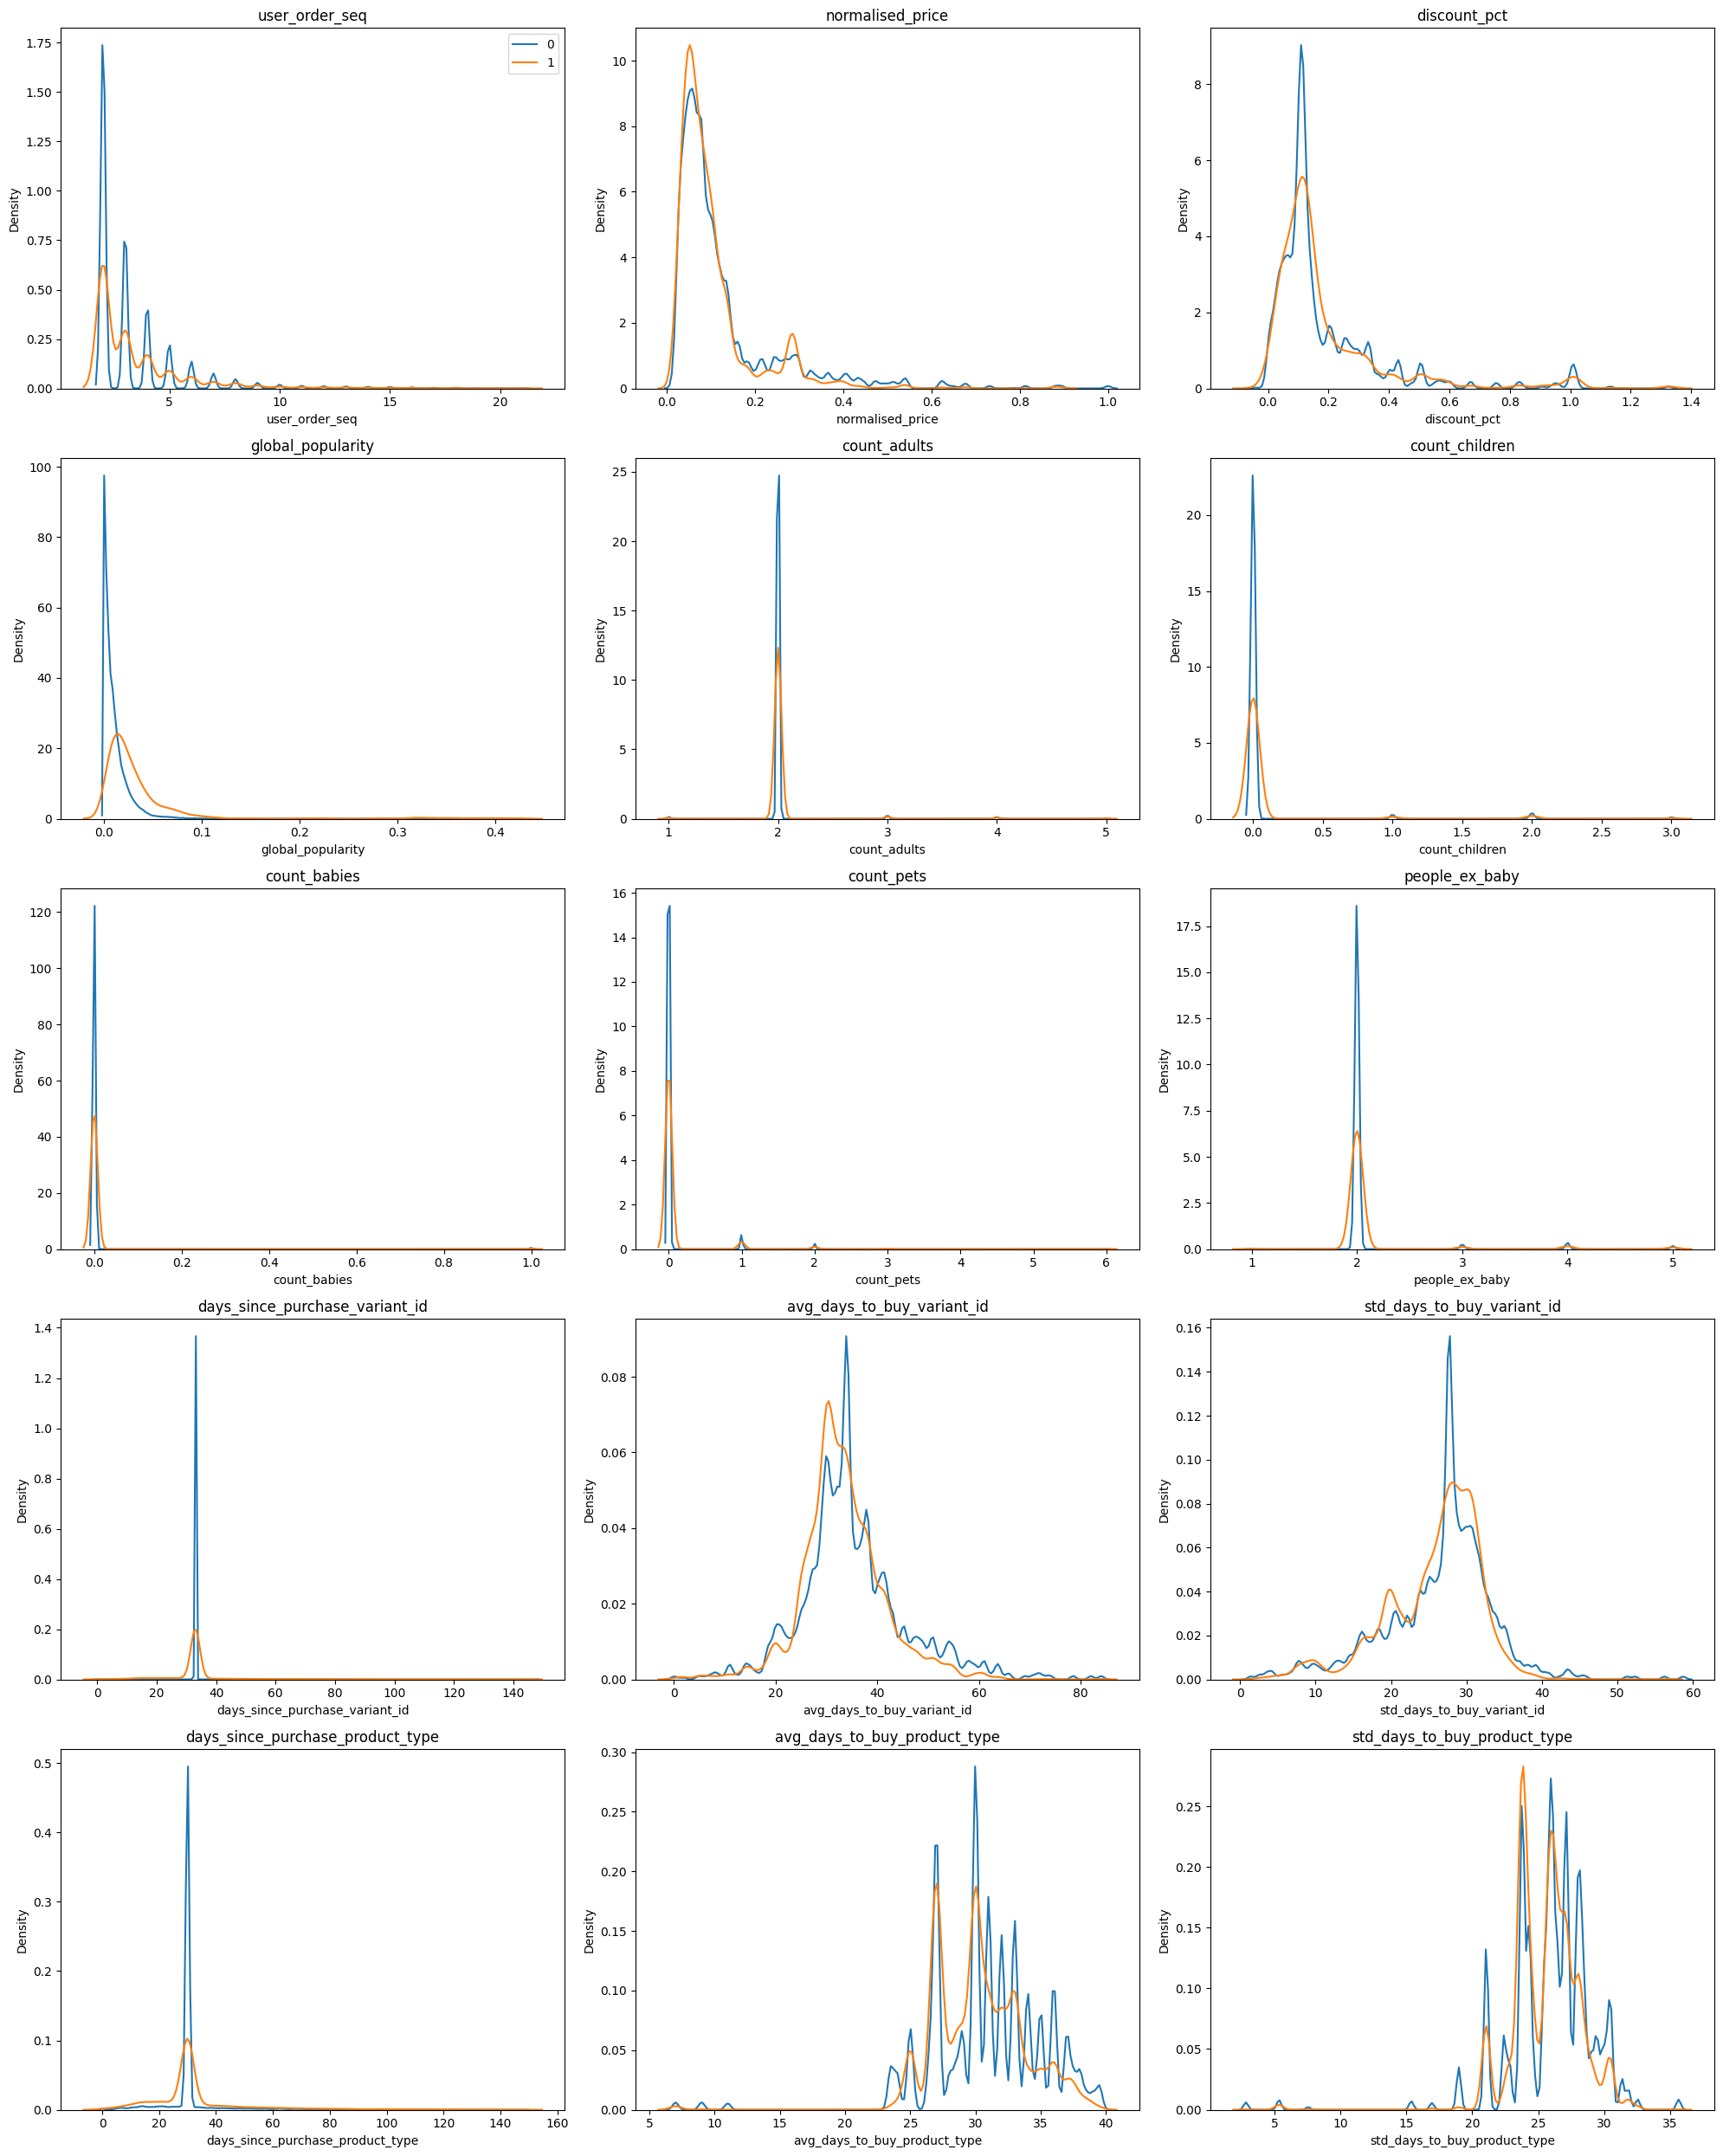

In [ ]:
'''cols = 3
rows = int(np.ceil(len(numerical_cols) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(20, 5 * rows))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(feature_frame_df.loc[lambda x: x.outcome == 0, col], label="0", ax=ax[i])
    sns.kdeplot(feature_frame_df.loc[lambda x: x.outcome == 1, col], label="1", ax=ax[i])
    ax[i].set_title(col)

ax[0].legend()
plt.tight_layout()'''

En este caso representamos las distribuciones para las dos clases (outcome 0 y outcome 1) de forma separada. Saber si la distribución es distinta para cada una de las clases es muy informativo.

* En global_popularity, cuando outcome=1, la popularidad de los productos es mas alta (cuando la popularidad es las alta, la probabilidad de que se compre es mas alta)

* Las variables de count_ siguen un patron extraño, ya que tienen unos picos extremadamente altos, esto se debe a que los missing values de estas variables se han imputado (ya sea con la media, mediana, freq...), esto lo que hace es que perdamos info, ya que quizas los usuarios que tenian esta info estaban muy correlados con outcome=1, se deberia haber añadido una columna que indique si el valor se ha imputado o no. Sin embargo, si aumenta el poder predictivo, es una buena imputacion, a pesar de la distribucion

In [167]:
feature_frame_df[categorical_cols].describe()

,product_type,vendor
count,2880549,2880549
unique,62,264
top,tinspackagedfoods,biona
freq,226474,146828


Tienen muchas categorias, por lo que categorical enconding empezaria por frequency encoding o algo que no aumente el numero de columnas en 62 o 264.

Es cierto, que la mejor forma de hacer coding de las variables categoricas es aquella que mejore el poder predictivo de mi modelo, por eso en el siguiente modulo se ve como crear un pipeline de entrenamiento que optimice las decisiones.

# ***Requisitos técnicos***

* Objetivo: Enviar notificaciones

* Contexto: Clientes pueden comprar productos desde aplicación móvil. De vez en cuando hay artículos que queremos promocionar (agotarlo para descatalogar, lotes a punto de caducar, buscar aumentar cuota de mercado, etc)

    Una forma de impulsar ventas y ofrecer descuentos es enviando notificaciones push, sin embargo, enviar demasiadas puede generar churn (desinstalar app). 

    Las notificaciones actuales tienen tasa de apertura de 5% actualmente.

    **Queremos un modelo predictivo que permita dirigirnos a un conjunto de usuarios con altas probabilidades de estar interesados en un artículo de nuestra elección que queramos promocionar para enviarles una notificación push**

* Requisitos: Usuarios que compren ese producto + otros 4 (minimo 5 productos)

    El sistema debería permitir a los operadores de venta seleccionar un artículo (el que queremos ofertar) y obtener el segmento de usuarios al que dirigirse y activar la notificación push.

* Impacto: El impacto previsto es aumentar las ventas mensuales un 2% y un impulso del 25% sobre los artículos seleccionados.



# ***Descripción técnica***

* Contexto: Producto para equipo de ventas, con el que puedan enviar notificacion push a los clientes para animarles a comprar un determinado producto (seleccionado por equipo de ventas).

    Nuestra tarea como data scientist es el **desarrollo de un modelo predictivo que se adapte a las necesidades del equipo de ventas**

* Objetivo: Modelo de aprendizaje automático que, dado un usuario y un producto, prediga  si el usuario lo compraría si estuviera comprando con nosotros en ese momento Centrarse únicamente en compras de al menos 5 artículos.

* Datos: feature_frame_df. Hay que ajustar los datos para mantener solo pedidos de 5 o más artículos

* Hito 1: Fase de exploración: Crear dataset 5 o más articulos --> Use linear models evaluated using train/validation/test split

    El resultado esperado es un notebook/documento de lo que ha funcionado y lo que no.

    **Lo más importante es que necesitamos tener un modelo final seleccionado para pasar al Hito 2**

            
* Hito 2: Código MVP (minimum viable product) --> (primera versión funcional del código que pueden utilizar los clientes)

    Utilizando los resultados del hito 1 se debe generar código listo para MVP. Queremos asegurarnos de que tenemos código listo para producción para nuestro pipeline

    Pasos presentes en pipeline:

    1. Cargar datos

    2. Preprocesamiento

    3. Entrenamiento/selección del modelo: Si procede, entrenar el modelo con diferentes parámetros y evaluar rendimiento para elegir el más eficaz. Entrenar modelo final y guardarlo en el disco para utilizarlo posteriormente para la inferencia. Dado que no estamos utilizando ningún marco de ingeniería de ML, pensar cual es un buen estándar para guardar los modelos entrenados para poder hacer un seguimiento de la historia de los modelos.



Primer paso: Quedarnos solo con pedidos que tengan 5 o mas articulos

In [168]:
compras_df = feature_frame_df[feature_frame_df['outcome'] == 1]
print(compras_df.shape)
compras_df.head()

(33232, 27)


,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
24,33826472919172,ricepastapulses,2811116486788,3463900528772,2020-10-08 09:31:35,2020-10-08 00:00:00,5,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
78,33826472919172,ricepastapulses,2816464388228,3781503156356,2020-10-14 15:28:26,2020-10-14 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,5.0,30.0,24.27618
142,33826472919172,ricepastapulses,2821889785988,3787000283268,2020-10-21 17:25:02,2020-10-21 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
218,33826472919172,ricepastapulses,2827451138180,3519639879812,2020-10-29 11:24:52,2020-10-29 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
239,33826472919172,ricepastapulses,2828980060292,3788931465348,2020-10-31 13:08:30,2020-10-31 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,10.0,30.0,24.27618


In [169]:
articulos_por_order_id = compras_df.groupby('order_id')['outcome'].count()
print(articulos_por_order_id)

order_id
2807985930372     9
2808027644036     6
2808099078276     9
2808393957508    13
2808429314180     3
                 ..
3643254800516     9
3643274788996     5
3643283734660    21
3643294515332     7
3643301986436     1
Name: outcome, Length: 3427, dtype: int64


In [170]:
orders_with_5_or_more = articulos_por_order_id[articulos_por_order_id >=5].index
num_orders_with_5_or_more = len(orders_with_5_or_more)
print(f"Hay {num_orders_with_5_or_more} ordenes con 5 articulos o más.")
orders_with_less5 = articulos_por_order_id[articulos_por_order_id < 5].index
num_orders_with_less5 = len(orders_with_less5)
print(f"Hay {num_orders_with_less5} ordenes con menos de 5 articulos.")
suma_orders = len(orders_with_5_or_more) + len(orders_with_less5)

order_id_totales = compras_df['order_id'].nunique()
print(f"Hay {order_id_totales} pedidos totales y la suma de pedidos de 5 articulos o mas con los pedidos de menos de 5 articulos es {suma_orders}.")

Hay 2603 ordenes con 5 articulos o más.
Hay 824 ordenes con menos de 5 articulos.
Hay 3427 pedidos totales y la suma de pedidos de 5 articulos o mas con los pedidos de menos de 5 articulos es 3427.


In [171]:
print(orders_with_5_or_more)

Index([2807985930372, 2808027644036, 2808099078276, 2808393957508,
       2808434524292, 2808548917380, 2808549900420, 2808728715396,
       2808769085572, 2808786714756,
       ...
       3643189461124, 3643199160452, 3643226718340, 3643229274244,
       3643240185988, 3643241300100, 3643254800516, 3643274788996,
       3643283734660, 3643294515332],
      dtype='int64', name='order_id', length=2603)


In [172]:
filtered_df = feature_frame_df[feature_frame_df['order_id'].isin(orders_with_5_or_more)]
print(filtered_df.shape)
filtered_df.head()

(2163953, 27)


,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
5,33826472919172,ricepastapulses,2808434524292,3479090790532,2020-10-06 10:50:23,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


Voy a analizar un unico user_id para entender mejor el dataset

In [173]:
random_user = (filtered_df[filtered_df['user_id'] == 3481384026244]).sort_values(by='order_date', ascending=True)
print(random_user.shape)
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(random_user.sample(30))

(3772, 27)
             variant_id                product_type       order_id        user_id           created_at           order_date  user_order_seq  outcome  ordered_before  abandoned_before  active_snoozed  set_as_regular  normalised_price  discount_pct               vendor  global_popularity  count_adults  count_children  count_babies  count_pets  people_ex_baby  days_since_purchase_variant_id  avg_days_to_buy_variant_id  std_days_to_buy_variant_id  days_since_purchase_product_type  avg_days_to_buy_product_type  std_days_to_buy_product_type
481915   33973246853252           tinspackagedfoods  2833529864324  3481384026244  2020-11-06 18:56:52  2020-11-06 00:00:00               5      0.0             0.0               0.0             0.0             0.0          0.089184      0.151976                heinz           0.094527           2.0             0.0           0.0         0.0             2.0                            33.0                        30.0                   30.234265  

El dataset original tiene a clientes que hayan hecho minimo 1 compra (el user_order_seq seria 2 ya que es la segunda compra), y al empezar en una determinada fecha, hay usuarios de los que no aparece info de compras pasadas (en el caso de el usuario anterior la primera compra que aparece en el dataset es su 4ª compra)

In [174]:
order_seq_0 = feature_frame_df[feature_frame_df['user_order_seq'] == 0]
print("Numero de filas con user_order_seq 0:", len(order_seq_0))
order_seq_1 = feature_frame_df[feature_frame_df['user_order_seq'] == 1]
print("Numero de filas con user_order_seq 1:", len(order_seq_1))
order_seq_2 = feature_frame_df[feature_frame_df['user_order_seq'] == 2]
print("Numero de filas con user_order_seq 2:", len(order_seq_2))

Numero de filas con user_order_seq 0: 0
Numero de filas con user_order_seq 1: 0
Numero de filas con user_order_seq 2: 1430901


Voy a probar un modelo para este usuario, para ver el funcionamiento de como entrenarlo con un conjunto pequeño.

En primer lugar manejar las variables categoricas.

In [175]:
type_freq = filtered_df['product_type'].value_counts(normalize=True).to_dict()
filtered_df['product_type'] = filtered_df['product_type'].map(type_freq)


vendor_freq = filtered_df['vendor'].value_counts(normalize=True).to_dict()
filtered_df['vendor'] = filtered_df['vendor'].map(vendor_freq)


/var/folders/2s/57zqmb6503l3ksq72nlsdh880000gr/T/ipykernel_48205/2241549010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['product_type'] = filtered_df['product_type'].map(type_freq)
/var/folders/2s/57zqmb6503l3ksq72nlsdh880000gr/T/ipykernel_48205/2241549010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['vendor'] = filtered_df['vendor'].map(vendor_freq)


In [176]:
reference_date = datetime(1970, 1, 1)
for col in ['created_at', 'order_date']:
    filtered_df[col] = (pd.to_datetime(filtered_df[col]) - reference_date).dt.total_seconds()




/var/folders/2s/57zqmb6503l3ksq72nlsdh880000gr/T/ipykernel_48205/2015274987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = (pd.to_datetime(filtered_df[col]) - reference_date).dt.total_seconds()
/var/folders/2s/57zqmb6503l3ksq72nlsdh880000gr/T/ipykernel_48205/2015274987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = (pd.to_datetime(filtered_df[col]) - reference_date).dt.total_seconds()


In [ ]:
X = filtered_df.drop('outcome', axis=1)
y = filtered_df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MAL DIVIDIDO, INFORMATION LEAKAGE!!

In [178]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Explora diferentes valores de C

grid_search = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid, cv=5, scoring='f1') # Usando f1-score como métrica

grid_search.fit(X_train, y_train)

model_lasso = grid_search.best_estimator_

/Users/alex/Library/Caches/pypoetry/virtualenvs/zrive-ds-lJfLNmKv-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alex/Library/Caches/pypoetry/virtualenvs/zrive-ds-lJfLNmKv-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alex/Library/Caches/pypoetry/virtualenvs/zrive-ds-lJfLNmKv-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alex/Library/Caches/pypoetry/virtualenvs/zrive-ds-lJfLNmKv-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alex/Library/Caches/pypoetry/virtualenvs/zrive-ds-lJfLNmKv-py3.11/lib

In [ ]:
model_lasso = LogisticRegression(penalty='l1', solver='liblinear')

model_lasso.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
y_pred = model_lasso.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    426559
         1.0       0.62      0.06      0.11      6232

    accuracy                           0.99    432791
   macro avg       0.80      0.53      0.55    432791
weighted avg       0.98      0.99      0.98    432791



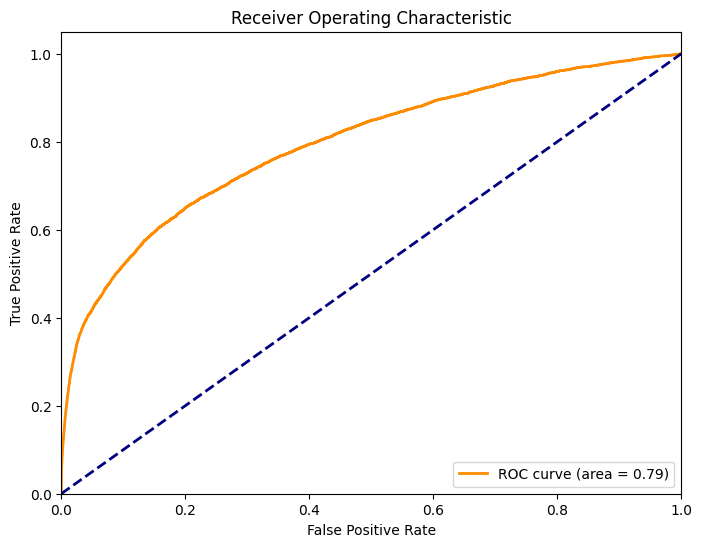

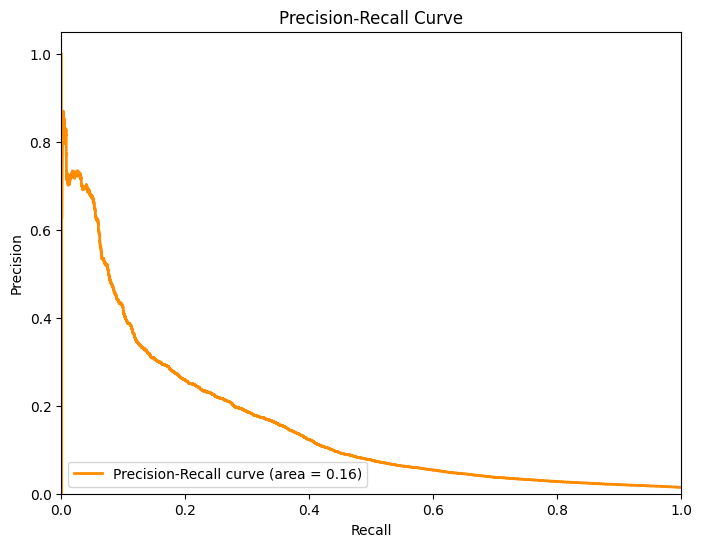

In [182]:
# Predecir probabilidades para la clase positiva (1.0)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Curva Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)  # Calcula el área bajo la curva precision-recall

# Para el "Average Precision Score", necesitas una versión más reciente de scikit-learn
# from sklearn.metrics import average_precision_score
# average_precision = average_precision_score(y_test, y_prob)

#  No hay una función auc directa para precision-recall en versiones antiguas,
#  así que calculamos el área bajo la curva "manualmente" con una aproximación trapezoidal.
# pr_auc = -np.sum(np.diff(recall) * np.array(precision)[:-1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()